In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing

In [2]:
from qiskit_machine_learning.datasets import ad_hoc_data
from qiskit_machine_learning.algorithms.classifiers import VQC
from qiskit_algorithms.optimizers import SPSA
from qiskit.circuit.library import TwoLocal, ZZFeatureMap

In [94]:
#take randomly 80% of the data for training and 20% for testing with the iris dataset
len = 0
#size of the dataset of iris csv
df = pd.read_csv('datasets/Iris_dataset.csv', delimiter=',')
tuples = [tuple(x) for x in df.values]
len = sum(1 for row in tuples)

#randomly shuffle the dataset
np.random.shuffle(tuples)
len = sum(1 for row in tuples)
print(len)

#take randomly 80% of the data for training and 20% for testing with the iris dataset
training_size = int(len*0.8)
testing_size = int(len*0.2)


#split the dataset into training and testing
train_features = tuples[:training_size]
size = sum(1 for row in train_features)
print("size of the training dataset: ", size)

# get the labels of the dataset
train_labels = []
for i in range(training_size):
    train_labels.append(train_features[i][4])
    train_features[i] = train_features[i][:4]
print("size of the training labels: ", sum(1 for row in train_labels))

test_features = tuples[training_size:]
print("size of the testing dataset: ", sum(1 for row in test_features))
test_labels = []
for i in range(testing_size):
    test_labels.append(test_features[i][4])
    test_features[i] = test_features[i][:4]

print("size of the testing labels: ", sum(1 for row in test_labels))


#convert to ndarray
train_features = np.array(train_features)
print("size of the training dataset: ", train_features.shape)

train_labels = np.array(train_labels)
print("size of the training labels: ", train_labels.shape)

test_features = np.array(test_features)
print("size of the testing dataset: ", test_features.shape)

test_labels = np.array(test_labels)
print("size of the testing labels: ", test_labels.shape)

#normalize the data
train_features = preprocessing.normalize(train_features)
test_features = preprocessing.normalize(test_features)

print(train_features)




150
size of the training dataset:  120
size of the training labels:  120
size of the testing dataset:  30
size of the testing labels:  30
size of the training dataset:  (120, 4)
size of the training labels:  (120,)
size of the testing dataset:  (30, 4)
size of the testing labels:  (30,)
[[0.80597792 0.52151512 0.26865931 0.07901744]
 [0.67467072 0.36998072 0.58761643 0.25028107]
 [0.73154399 0.28501714 0.57953485 0.21851314]
 [0.80327412 0.55126656 0.22050662 0.04725142]
 [0.76578311 0.60379053 0.22089897 0.0147266 ]
 [0.73089855 0.30454106 0.58877939 0.1624219 ]
 [0.72712585 0.26661281 0.60593821 0.18178146]
 [0.80779568 0.53853046 0.23758697 0.03167826]
 [0.71366557 0.28351098 0.61590317 0.17597233]
 [0.76301853 0.33526572 0.53180079 0.15029153]
 [0.73081412 0.34743622 0.56308629 0.16772783]
 [0.73544284 0.35458851 0.55158213 0.1707278 ]
 [0.80003025 0.53915082 0.26087943 0.03478392]
 [0.71578999 0.34430405 0.5798805  0.18121266]
 [0.80218492 0.54548574 0.24065548 0.0320874 ]
 [0.786

In [4]:
optimizer = SPSA(maxiter=200)
feature_map = ZZFeatureMap(feature_dimension=4, reps=1)
var_form = TwoLocal(4, ['ry', 'rz'], 'cz', reps=4)
vqc = VQC(optimizer = optimizer, feature_map = feature_map, ansatz=var_form, loss="cross_entropy")

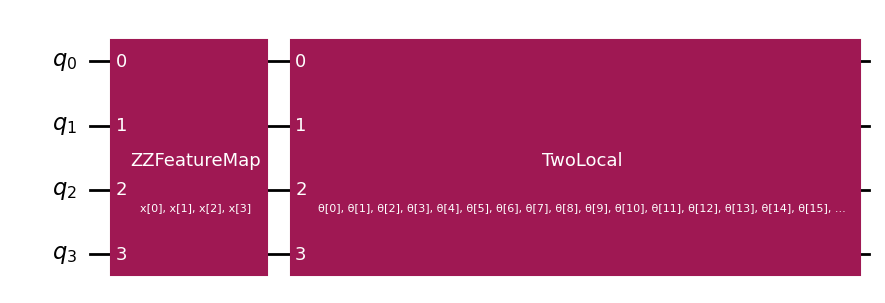

In [5]:
vqc.circuit.draw(output='mpl')

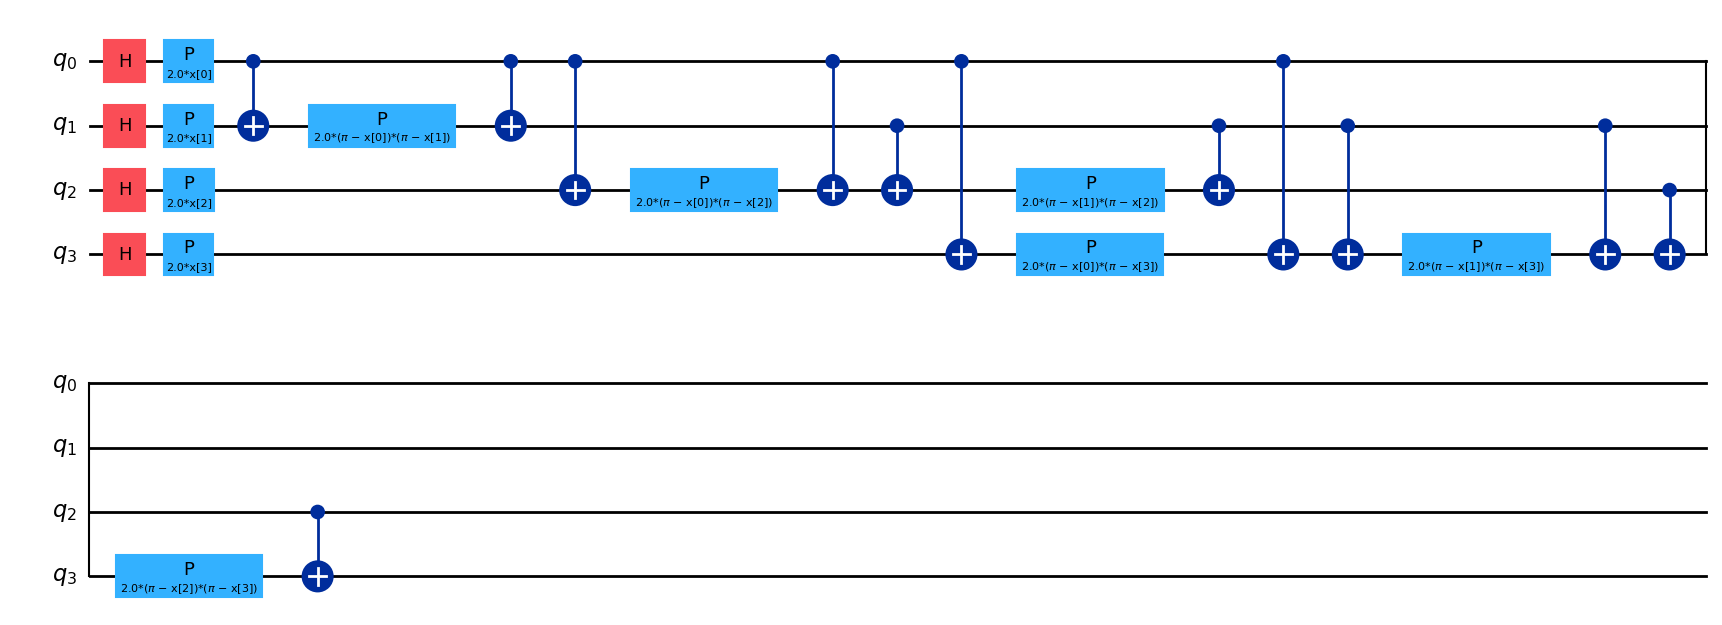

In [6]:
vqc.feature_map.decompose().draw(output='mpl')

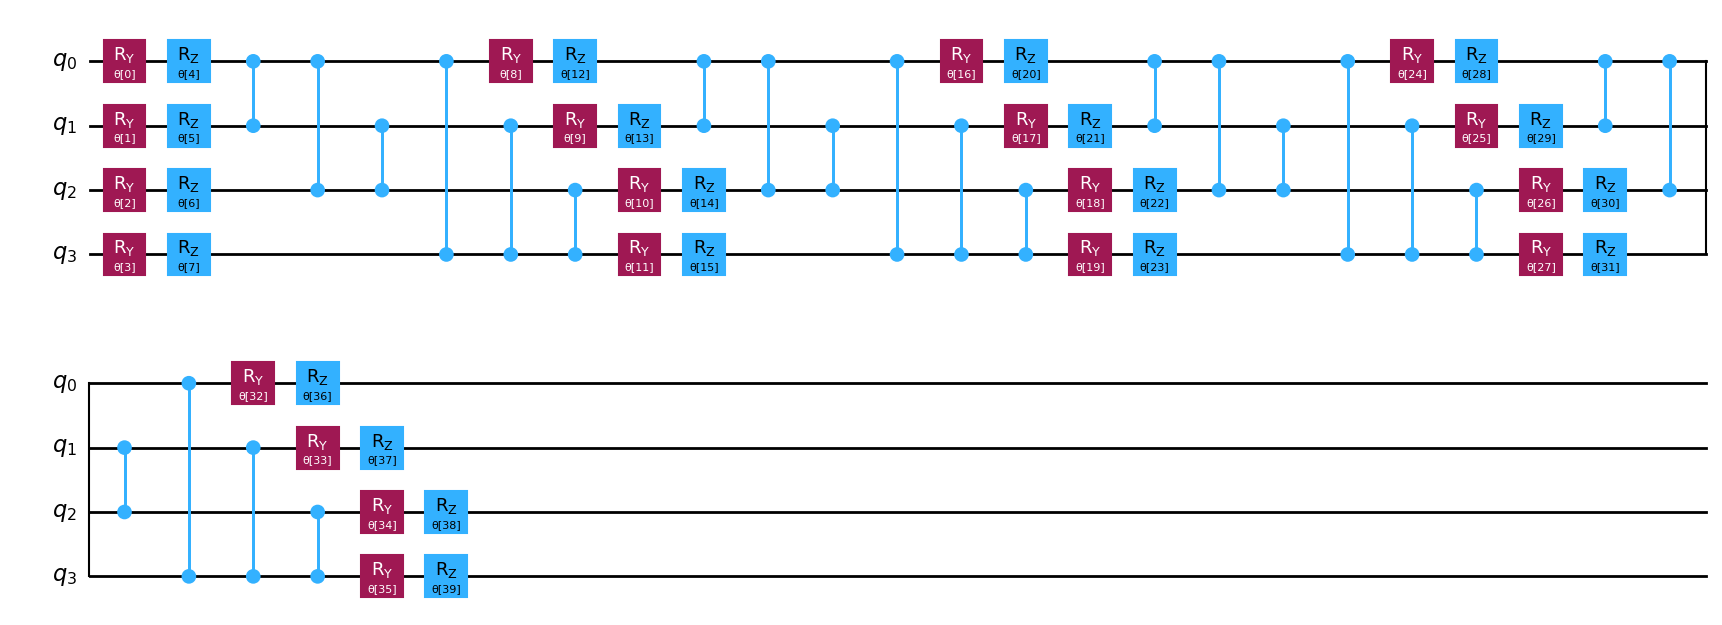

In [7]:
vqc.ansatz.decompose().draw(output='mpl')

In [8]:
vqc.fit(train_features, train_labels)

In [9]:
vqc.score(train_features, train_labels)

0.6666666666666666

In [10]:
vqc.score(test_features, test_labels)

0.5666666666666667

In [11]:
predict = vqc.predict(test_features)
print(f"Predicted labels: {predict}")
print(f"Ground truth:     {test_labels}")

Predicted labels: ['Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa']
Ground truth:     ['Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-ve